# K-Means Clustering
k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [27]:
X, y = make_blobs(n_samples = 90, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

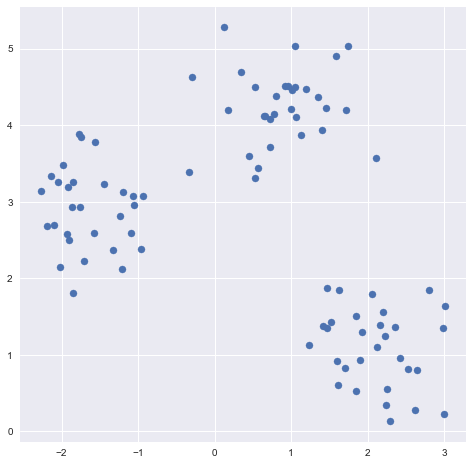

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], marker = 'o',s=50)

In [29]:
from sklearn.cluster import KMeans

method = 'random'
method = 'k-means++'

In [30]:
km = KMeans(n_clusters = 3, init=method, n_init=10, max_iter=300, tol=1e-4, random_state=0)

In [31]:
y_km = km.fit_predict(X)

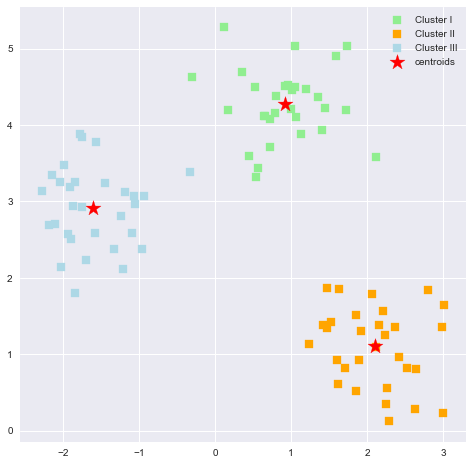

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_km==0,0],X[y_km==0,1], c = 'lightgreen',marker = 's',label='Cluster I',s=50)
plt.scatter(X[y_km==1,0],X[y_km==1,1], c = 'orange',marker = 's',label='Cluster II',s=50)
plt.scatter(X[y_km==2,0],X[y_km==2,1], c = 'lightblue',marker = 's',label='Cluster III',s=50)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red',marker = '*',label='centroids',s=250)
plt.legend()

## Choosing the Optimal Value of K

In [33]:
distortions = []

for k in range(1,11):
    km = KMeans(n_clusters = k, init=method, n_init=10, max_iter=300,random_state=0)
    km.fit_predict(X)    
    distortions.append(km.inertia_)

Text(0, 0.5, 'Distortion')

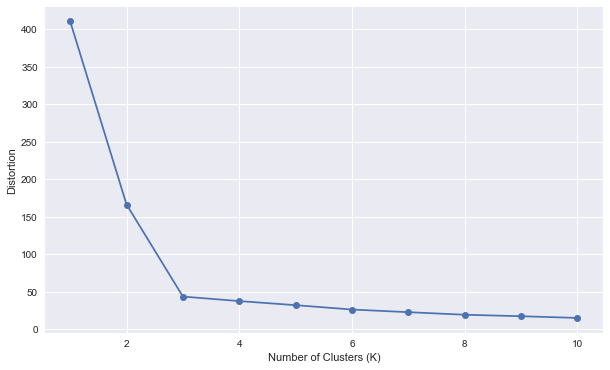

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')

Looks like there is an elbow at 'K=3'

# Agglomerative Clustering 

In [35]:
import HelpfulFunctions as hp

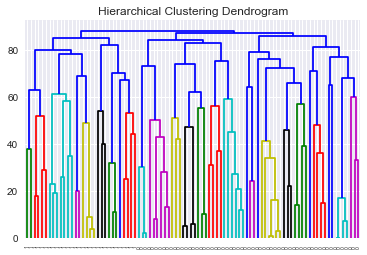

In [36]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
hp.plot_dendrogram(model, plt,labels=model.labels_)

# Agglomerative Clustering Isis

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = pd.DataFrame(iris.data)
X_iris.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
y_iris = iris.target
f1 = 'sepalLength'
f2 = 'sepalWidth'

In [38]:
X_iris = X_iris[[f1, f2]]

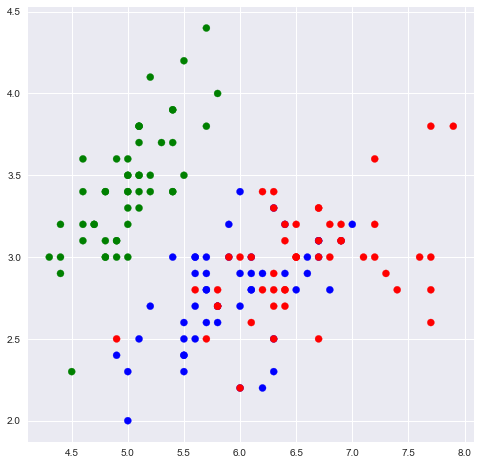

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(X_iris.values[:,0], X_iris.values[:,1], marker = 'o',c = hp.setcolor(y_iris), s=50)

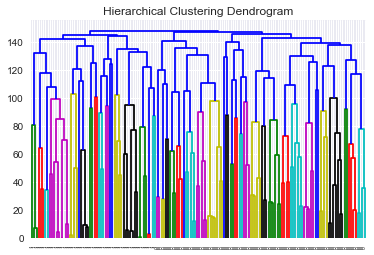

In [40]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model = model.fit(X_iris)
plt.title('Hierarchical Clustering Dendrogram')
hp.plot_dendrogram(model, plt,labels=model.labels_)